# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dfCounting = pd.read_csv("Results16/countingSort-PC16.csv")
dfCounting.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfQuickSort = pd.read_csv("Results16/quickSort-PC16.csv")
dfQuickSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfBubbleSort = pd.read_csv("Results16/bubbleSort-PC16.csv")
dfBubbleSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfMergeSort = pd.read_csv("Results16/mergeSort-PC16.csv")
dfMergeSort.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV = pd.read_csv("Results16/readCSV-PC16.csv")
dfReadCSV.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]


#### Moving information from Test name to a seperate column 

In [4]:
#input type
l = []
for i in range(len(dfCounting)):
    l.append(dfCounting.iloc[i]["Test name"].split("-")[0])

dfCounting["Input case"] = l


l = []
for i in range(len(dfQuickSort)):
    l.append(dfQuickSort.iloc[i]["Test name"].split("-")[0])

dfQuickSort["Input case"] = l



l = []
for i in range(len(dfBubbleSort)):
    l.append(dfBubbleSort.iloc[i]["Test name"].split("-")[0])

dfBubbleSort["Input case"] = l


l = []
for i in range(len(dfMergeSort)):
    l.append(dfMergeSort.iloc[i]["Test name"].split("-")[0])

dfMergeSort["Input case"] = l

In [5]:
#input size
l = []
for i in range(len(dfCounting)):
    l.append(dfCounting.iloc[i]["Test name"].split("-")[1])

dfCounting["Size"] = l


l = []
for i in range(len(dfQuickSort)):
    l.append(dfQuickSort.iloc[i]["Test name"].split("-")[1])

dfQuickSort["Size"] = l



l = []
for i in range(len(dfBubbleSort)):
    l.append(dfBubbleSort.iloc[i]["Test name"].split("-")[1])

dfBubbleSort["Size"] = l


l = []
for i in range(len(dfMergeSort)):
    l.append(dfMergeSort.iloc[i]["Test name"].split("-")[1])

dfMergeSort["Size"] = l


l = []
for i in range(len(dfReadCSV)):
    l.append(dfReadCSV.iloc[i]["Test name"].split("d")[-1])

dfReadCSV["Size"] = l

In [6]:


#removing values that are nonsense 
dfCounting = dfCounting[dfCounting['PKG (J)'] >= 0]
dfCounting = dfCounting[dfCounting['CPU (J)'] >= 0]
#df = df[df['Memory (byte)'] >= 0]
#df = df[df['Temperature'] >= 0]
dfCounting = dfCounting[dfCounting['Time (ms)'] >= 0]

dfCounting = dfCounting.replace("  ", np.nan)

#missing values for each column
print("MISSING DATA: \n\n ", dfCounting.isnull().sum(axis=0))

dfReadCSV["Time (ms)"].sum()/1000/60/60


MISSING DATA: 

  Test name          0
PKG (J)            0
CPU (J)            0
GPU (J)        20799
Memory (J)         0
Temperature        0
Time (ms)          0
Input case         0
Size               0
dtype: int64


5.783314213333333

#### Removing ourliers

#### Subtract readCSV from data

In [7]:
#Counting sort
bgAVGrand = []
bgAVGWorst = []
bgAVGBest = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGrand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVCountingRand{s[size]}"].mean())

for size in range(len(s)):
    bgAVGWorst.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVCountingBest{s[size]}"].mean())

for size in range(len(s)):
    bgAVGBest.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVCountingWorst{s[size]}"].mean())

for i in range(len(dfCounting)):
    for size in range(len(s)):
        if (int(dfCounting["Size"][i]) == s[size]):
            if(dfCounting["Input case"][i] != "worst" and dfCounting["Input case"][i] != "best"):
                l.append(dfCounting["CPU (J)"][i] - bgAVGrand[size]["CPU (J)"])
            if(dfCounting["Input case"][i] == "best"):
                l.append(dfCounting["CPU (J)"][i] - bgAVGBest[size]["CPU (J)"])                                         
            if(dfCounting["Input case"][i] == "worst"):
                l.append(dfCounting["CPU (J)"][i] - bgAVGWorst[size]["CPU (J)"])                               

dfCounting["CPU - BG"] = l
dfCounting[dfCounting["Input case"] == "best"]


,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size,CPU - BG
10399,best-25000-1,1.878296,1.601929,NaN,0.118958,62,223.673,best,25000,NaN
10400,best-25000-1,1.876892,1.619263,NaN,0.113342,62,195.949,best,25000,NaN
10401,best-25000-1,1.891479,1.635620,NaN,0.111633,62,196.755,best,25000,NaN
10402,best-25000-1,1.797913,1.523071,NaN,0.118103,62,216.795,best,25000,NaN
10403,best-25000-1,1.755127,1.432678,NaN,0.127747,62,281.388,best,25000,NaN
...,...,...,...,...,...,...,...,...,...,...
15594,best-1000000-1,6.719788,5.797974,NaN,0.380432,71,713.453,best,1000000,NaN
15595,best-1000000-1,6.539246,5.623535,NaN,0.380737,71,725.147,best,1000000,NaN
15596,best-1000000-1,6.512512,5.608704,NaN,0.366638,71,724.385,best,1000000,NaN
15597,best-1000000-1,6.630493,5.714172,NaN,0.381470,70,707.163,best,1000000,NaN


In [8]:
#Bubblesort
bgAVGbubbleRand = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGbubbleRand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVRand{s[size]}"].mean())

for i in range(len(dfBubbleSort)):
    for size in range(len(s)):
        if (int(dfBubbleSort["Size"][i]) == s[size]):
            if(dfBubbleSort["Input case"][i] != "worst" and dfBubbleSort["Input case"][i] != "best"):
                l.append(dfBubbleSort["CPU (J)"][i] - bgAVGbubbleRand[size]["CPU (J)"])
            if(dfBubbleSort["Input case"][i] == "best"):
                l.append(0)                                         # We're missing sorted. Has been named "revsorted" in the Makefile for readCSV
            if(dfBubbleSort["Input case"][i] == "worst"):
                l.append(0)                                         # we need to redo rev-sorted. has been mixed with revsorted in the Makefile for readCSV

dfBubbleSort["CPU - BG"] = l

dfBubbleSort


,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size,CPU - BG
0,random1-25000-1,13.232300,11.544128,,0.399902,69,1710.16,random1,25000,NaN
1,random1-25000-1,14.163696,12.361511,,0.493103,69,1723.56,random1,25000,NaN
2,random1-25000-1,13.530029,11.768127,,0.451172,69,1730.49,random1,25000,NaN
3,random1-25000-1,14.085632,12.302307,,0.486084,70,1704.74,random1,25000,NaN
4,random1-25000-1,14.142822,12.376465,,0.485718,70,1699.14,random1,25000,NaN
...,...,...,...,...,...,...,...,...,...,...
11755,worst-500000-1,815.602600,719.116455,,18.233643,64,107186.00,worst,500000,0.0
11756,worst-500000-1,806.500366,709.628906,,19.146301,57,107578.00,worst,500000,0.0
11757,worst-500000-1,808.787598,712.215637,,18.715515,63,107361.00,worst,500000,0.0
11758,worst-500000-1,810.676819,712.063965,,20.324219,57,108984.00,worst,500000,0.0


In [9]:
#Mergesort
bgAVGrand = []
bgAVGWorst = []
bgAVGBest = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGrand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVRand{s[size]}"].mean())
for size in range(len(s)):
    bgAVGWorst.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVMergeWorst{s[size]}"].mean())
for size in range(len(s)):
    bgAVGBest.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVMergeBest{s[size]}"].mean())

for i in range(len(dfMergeSort)):
    for size in range(len(s)):
        if (int(dfMergeSort["Size"][i]) == s[size]):
            if(dfMergeSort["Input case"][i] != "worst" and dfMergeSort["Input case"][i] != "best"):
                l.append(dfMergeSort["CPU (J)"][i] - bgAVGrand[size]["CPU (J)"])
            if(dfMergeSort["Input case"][i] == "best"):
                l.append(0)                                         # We're missing sorted. Has been named "revsorted" in the Makefile for readCSV
            if(dfMergeSort["Input case"][i] == "worst"):
                l.append(dfMergeSort["CPU (J)"][i] - bgAVGWorst[size]["CPU (J)"])                                         # we need to redo rev-sorted. has been mixed with revsorted in the Makefile for readCSV

dfMergeSort["CPU - BG"] = l

dfMergeSort[dfMergeSort["Input case"]=="best"]


,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size,CPU - BG
6399,best-25000-1,2.144348,1.843567,,0.133606,72,209.112,best,25000,0.0
6400,best-25000-1,2.076294,1.757446,,0.127869,72,241.316,best,25000,0.0
6401,best-25000-1,2.113647,1.822815,,0.119995,72,212.796,best,25000,0.0
6402,best-25000-1,2.221313,1.927490,,0.131714,72,214.291,best,25000,0.0
6403,best-25000-1,2.150085,1.861267,,0.121155,72,212.584,best,25000,0.0
...,...,...,...,...,...,...,...,...,...,...
11594,best-1000000-1,7.467285,6.437561,,0.411072,72,805.561,best,1000000,0.0
11595,best-1000000-1,8.039001,6.894043,,0.473633,72,861.733,best,1000000,0.0
11596,best-1000000-1,7.963867,6.857239,,0.462646,71,828.897,best,1000000,0.0
11597,best-1000000-1,8.168213,7.050232,,0.470093,71,841.059,best,1000000,0.0


In [10]:
#Quicksort
bgAVGrand = []
bgAVGWorst = []
bgAVGBest = []
s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
l = []
for size in range(len(s)):
    bgAVGrand.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVRand{s[size]}"].mean())
for size in range(len(s)):
    bgAVGWorst.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVMergeWorst{s[size]}"].mean())
for size in range(len(s)):
    bgAVGBest.append(dfReadCSV[dfReadCSV["Test name"] == f"readCSVQuickBest{s[size]}"].mean())

for i in range(len(dfQuickSort)):
    for size in range(len(s)):
        if (int(dfQuickSort["Size"][i]) == s[size]):
            if(dfQuickSort["Input case"][i] != "worst" and dfQuickSort["Input case"][i] != "best"):
                l.append(dfQuickSort["CPU (J)"][i] - bgAVGrand[size]["CPU (J)"])
            if(dfQuickSort["Input case"][i] == "best"):
                l.append(dfQuickSort["CPU (J)"][i] - bgAVGBest[size]["CPU (J)"])                                         
            if(dfQuickSort["Input case"][i] == "worst"):
                l.append(0)                                         # we need to redo rev-sorted. has been mixed with revsorted in the Makefile for readCSV

dfQuickSort["CPU - BG"] = l

## PLOTS

#### Basic plots (raw data vs size/time)

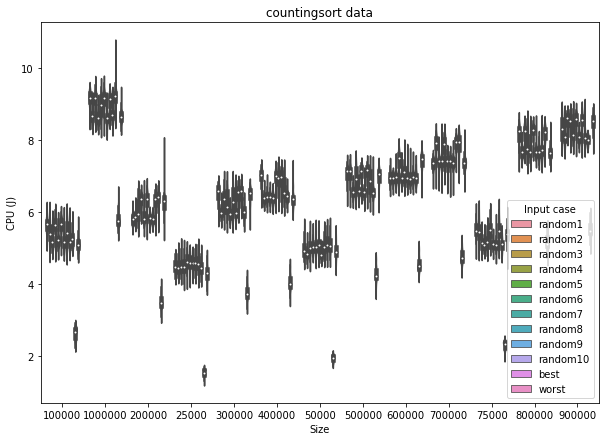

In [11]:
plt.figure(figsize=(10,7))
plt.title("countingsort data")
sns.violinplot(data = dfCounting, y = "CPU (J)", x = "Size", hue = "Input case")

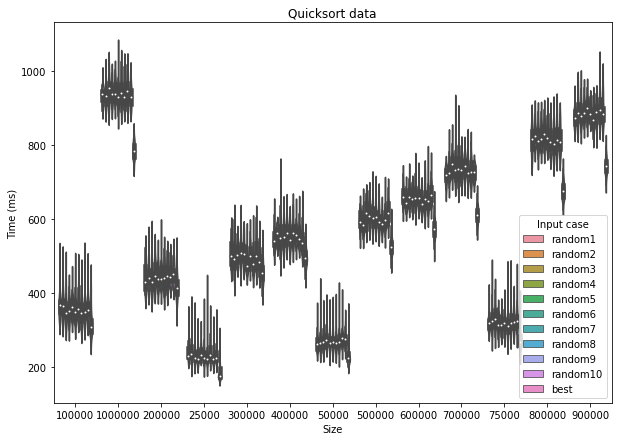

In [12]:
plt.figure(figsize=(10,7))
plt.title("Quicksort data")
sns.violinplot(data = dfQuickSort[dfQuickSort["Input case"] != "worst"], y = "Time (ms)", x = "Size", hue ="Input case")

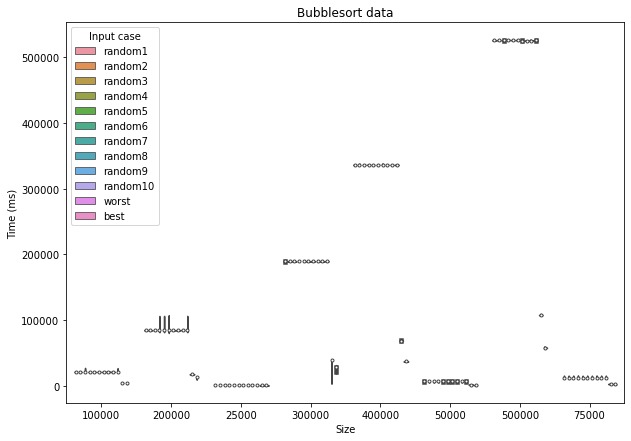

In [13]:
plt.figure(figsize=(10,7))
plt.title("Bubblesort data")
sns.violinplot(data = dfBubbleSort, y = "Time (ms)", x = "Size", hue ="Input case")

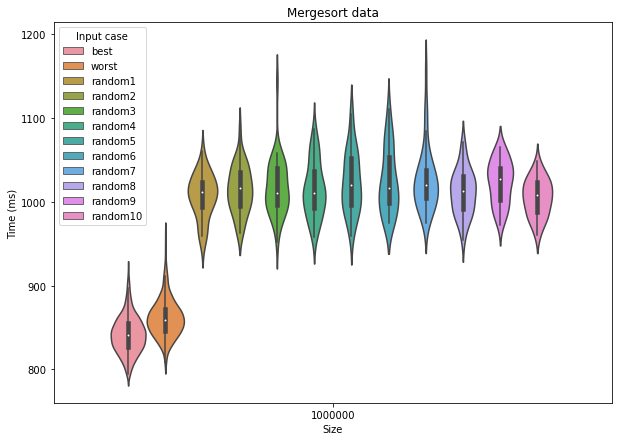

In [14]:
plt.figure(figsize=(10,7))
plt.title("Mergesort data")
sns.violinplot(data = dfMergeSort[dfMergeSort["Size"] == "1000000"], y = "Time (ms)", x = "Size", hue ="Input case")

## ReadCSV subtracted from data PLOTS

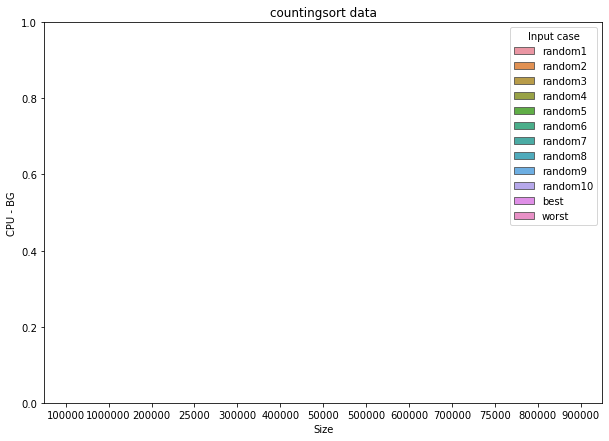

In [15]:
plt.figure(figsize=(10,7))
plt.title("countingsort data") # [dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"]
sns.violinplot(data = dfCounting, y = "CPU - BG", x = "Size", hue = "Input case")

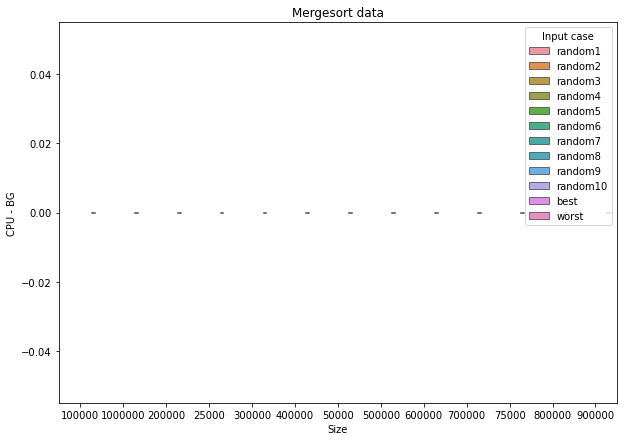

In [16]:
plt.figure(figsize=(10,7))
plt.title("Mergesort data") # [dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"]
sns.violinplot(data = dfMergeSort, y = "CPU - BG", x = "Size", hue = "Input case")

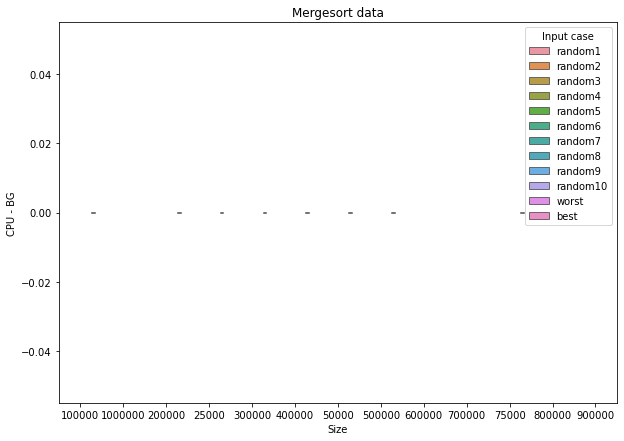

In [17]:
plt.figure(figsize=(10,7))
plt.title("Mergesort data") # [dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"]
sns.violinplot(data = dfQuickSort, y = "CPU - BG", x = "Size", hue = "Input case")

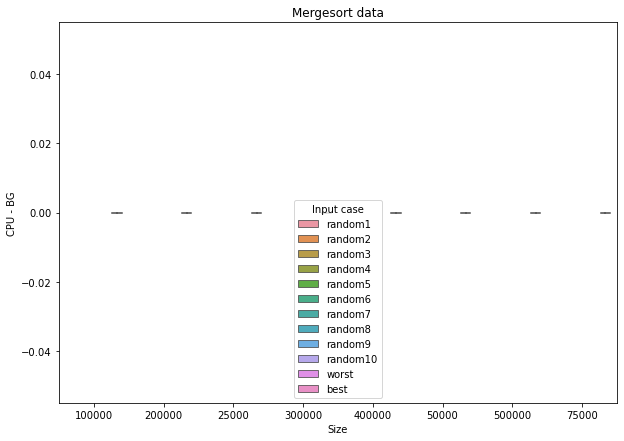

In [18]:
plt.figure(figsize=(10,7))
plt.title("Mergesort data") # [dfCounting["Input case"]!="best"][dfCounting["Input case"]!="worst"]
sns.violinplot(data = dfBubbleSort, y = "CPU - BG", x = "Size", hue = "Input case")

## Calculating Bubblesort mean values for each PC


In [25]:
bubble16 = pd.read_csv("results16/bubbleSort-PC16.csv")
bubble16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
bubble21 = pd.read_csv("Results21/bubbleSort-PC21.csv")
bubble21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
bubble23 = pd.read_csv("Results23/bubbleSort-PC23.csv") 
bubble23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
bubble6 = pd.read_csv("Results6/bubbleSort-PC6.csv")
bubble6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]


readCSV16 = pd.read_csv("Results16/readCSV-PC16.csv")
readCSV16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
readCSV6 = pd.read_csv("Results6/readCSV-PC6.csv")
readCSV6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
readCSV21 = pd.read_csv("Results21/readCSV-PC21.csv")
readCSV21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
readCSV23 = pd.read_csv("Results23/readCSV-PC23.csv")
readCSV23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

#note: removed line 5361 from bubble16 and bubble21, incomplete data --> 2 tests missing

In [28]:
#remove data less than zero

def removeNonsense(df):
    df = df[df["PKG (J)"]>=0]
    df = df[df["CPU (J)"]>=0]
    df = df[df["Time (ms)"]>=0]
    return df

bubble21 = removeNonsense(bubble21)
bubble16 = removeNonsense(bubble16)
bubble23 = removeNonsense(bubble23)
bubble6 = removeNonsense(bubble6)

readCSV21 = removeNonsense(readCSV21)
readCSV16 = removeNonsense(readCSV16)
readCSV23 = removeNonsense(readCSV23)
readCSV6 = removeNonsense(readCSV6)


In [29]:
def makeinputColumn(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[0])

    df["Input case"] = l
makeinputColumn(bubble21)
makeinputColumn(bubble23)
makeinputColumn(bubble6)
makeinputColumn(bubble16)
print(bubble21.head())

def makeinputColumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[1].lower())
    df["Input case"] = l
    
makeinputColumn_readCSV(readCSV16)
makeinputColumn_readCSV(readCSV21)
makeinputColumn_readCSV(readCSV23)
makeinputColumn_readCSV(readCSV6)


         Test name    PKG (J)    CPU (J) GPU (J)  Memory (J)  Temperature  \
0  random1-25000-1  13.687622  11.975342            0.452087           64   
1  random1-25000-1  13.029724  11.397583            0.402527           63   
2  random1-25000-1  11.844849  10.414124            0.423218           62   
3  random1-25000-1  11.333008   9.908752            0.398010           62   
4  random1-25000-1  13.409180  11.683655            0.410400           62   

   Time (ms) Input case  
0    1732.36    random1  
1    1704.73    random1  
2    1399.99    random1  
3    1416.54    random1  
4    1703.89    random1  


In [30]:
def makeSizecolumn(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[1]))

    df["Size"] = l
makeSizecolumn(bubble21)
makeSizecolumn(bubble23)
makeSizecolumn(bubble6)
makeSizecolumn(bubble16)

def makeSizecolumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[-1]))

    df["Size"] = l

makeSizecolumn_readCSV(readCSV16)
makeSizecolumn_readCSV(readCSV21)
makeSizecolumn_readCSV(readCSV23)
makeSizecolumn_readCSV(readCSV6)

In [31]:
bubble16.head()

,Test name,PKG (J),CPU (J),GPU (J),Memory (J),Temperature,Time (ms),Input case,Size
0,random1-25000-1,13.232300,11.544128,,0.399902,69,1710.16,random1,25000
1,random1-25000-1,14.163696,12.361511,,0.493103,69,1723.56,random1,25000
2,random1-25000-1,13.530029,11.768127,,0.451172,69,1730.49,random1,25000
3,random1-25000-1,14.085632,12.302307,,0.486084,70,1704.74,random1,25000
4,random1-25000-1,14.142822,12.376465,,0.485718,70,1699.14,random1,25000


### remove outliers

In [35]:
def remove_outliers(df, type, size):
    q1 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.25)
    q3 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.75)
    IQR = q3 - q1 
    LF = q1 - 1.5* IQR
    UF = q3 + 1.5* IQR

    #print(f"For size, case: {size},{type}. Lower fence: {LF} Upper fence: {UF}.")
    df = df[df["Input case"] == type][df["Size"]==size][df["CPU (J)"] <= UF]
    df = df[df["Input case"] == type][df["Size"]==size][df["CPU (J)"] >= LF]

In [36]:
def remove_outliers_for_pc(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000]#,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    for case in range(len(c)):
        for size in range(len(s)):
            remove_outliers(df, c[case], s[size])
remove_outliers_for_pc(bubble16)
remove_outliers_for_pc(bubble6)
remove_outliers_for_pc(bubble21)
remove_outliers_for_pc(bubble23)

<ipython-input-35-f2c76603eeb4>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.25)
<ipython-input-35-f2c76603eeb4>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size]["CPU (J)"].quantile(q=0.75)
<ipython-input-35-f2c76603eeb4>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["Input case"] == type][df["Size"]==size][df["CPU (J)"] <= UF]


In [41]:
def meanData(df,type,size):
    mean = df[df["Input case"] == type][df["Size"]==size].mean()
    mean["Input case"] = type
    return mean

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000]#,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    list_of_means = []
    for case in range(len(c)):
        for size in range(len(s)):
            list_of_means.append(meanData(df, c[case], s[size]))   
    return list_of_means


mean16 = mean_of_dataset(bubble16)
mean21 = mean_of_dataset(bubble21)
mean23 = mean_of_dataset(bubble23)
mean6 = mean_of_dataset(bubble6)

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


'''def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000]#,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    list_of_means = []
    for case in range(len(c)):
        for size in range(len(s)):
            list_of_means.append(meanData(df, c[case], s[size]))   
    return list_of_means

avg16_readCSV = mean_of_dataset_readCSV(readCSV16)
avg21_readCSV = mean_of_dataset_readCSV(readCSV21)
avg23_readCSV = mean_of_dataset_readCSV(readCSV23)
avg6_readCSV = mean_of_dataset_readCSV(readCSV6)'''





<ipython-input-41-64af70eb49fc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean = df[df["Input case"] == type][df["Size"]==size].mean()


'def mean_of_dataset_readCSV(df):\n    s = [25000,50000,75000,100000,200000,300000,400000,500000]#,600000,700000,800000,900000,1000000]\n    c = list_of_case(df)\n    list_of_means = []\n    for case in range(len(c)):\n        for size in range(len(s)):\n            list_of_means.append(meanData(df, c[case], s[size]))   \n    return list_of_means\n\navg16_readCSV = mean_of_dataset_readCSV(readCSV16)\navg21_readCSV = mean_of_dataset_readCSV(readCSV21)\navg23_readCSV = mean_of_dataset_readCSV(readCSV23)\navg6_readCSV = mean_of_dataset_readCSV(readCSV6)'

In [42]:
print(mean16)

[PKG (J)         4.16591
CPU (J)         3.65254
Memory (J)     0.200856
Temperature     68.1675
Time (ms)       413.641
Size              25000
Input case         best
dtype: object, PKG (J)         7.76865
CPU (J)         6.80346
Memory (J)     0.293781
Temperature       65.96
Time (ms)       902.305
Size              50000
Input case         best
dtype: object, PKG (J)         16.3658
CPU (J)         14.3679
Memory (J)     0.496647
Temperature       62.65
Time (ms)       2053.89
Size              75000
Input case         best
dtype: object, PKG (J)          26.714
CPU (J)           23.48
Memory (J)     0.730396
Temperature       61.59
Time (ms)        3436.1
Size             100000
Input case         best
dtype: object, PKG (J)        98.8306
CPU (J)        87.0582
Memory (J)     2.33908
Temperature      61.38
Time (ms)      12994.3
Size            200000
Input case        best
dtype: object, PKG (J)        192.943
CPU (J)        169.979
Memory (J)     4.43651
Temperature      60.64

In [46]:
def make_sub_readCSV(inList):
    for i in range(len(inList)):
        case = inList[i]["Input case"]
        size = inList[i]["Size"]
        if case == "best":
            case = "sorted"
        if case == "worst":
            case = "reversesorted"
        inList[i]["CPU - readCSV"] = inList[i]["CPU (J)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["CPU (J)"]
        inList[i]["Time - readCSV"] = inList[i]["Time (ms)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["Time (ms)"]
        inList[i]["Memory - readCSV"] = inList[i]["Memory (J)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["Memory (J)"]

make_sub_readCSV(mean16)
make_sub_readCSV(mean21)
make_sub_readCSV(mean23)
make_sub_readCSV(mean6)

<ipython-input-46-cd40c000e81f>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inList[i]["CPU - readCSV"] = inList[i]["CPU (J)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["CPU (J)"]
<ipython-input-46-cd40c000e81f>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inList[i]["Time - readCSV"] = inList[i]["Time (ms)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["Time (ms)"]
<ipython-input-46-cd40c000e81f>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inList[i]["Memory - readCSV"] = inList[i]["Memory (J)"] - readCSV16[readCSV16["Input case"] == case][readCSV16["Size"]==size].mean()["Memory (J)"]


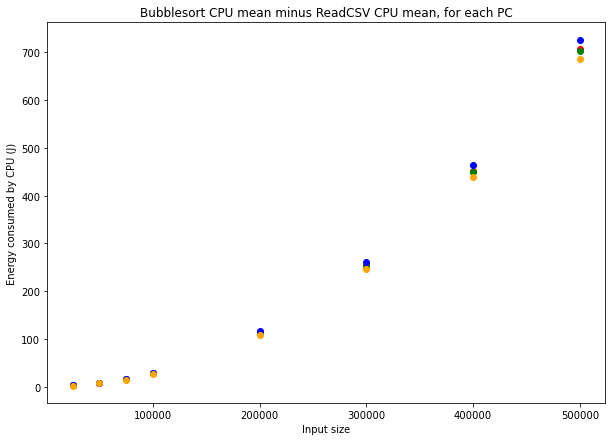

No handles with labels found to put in legend.


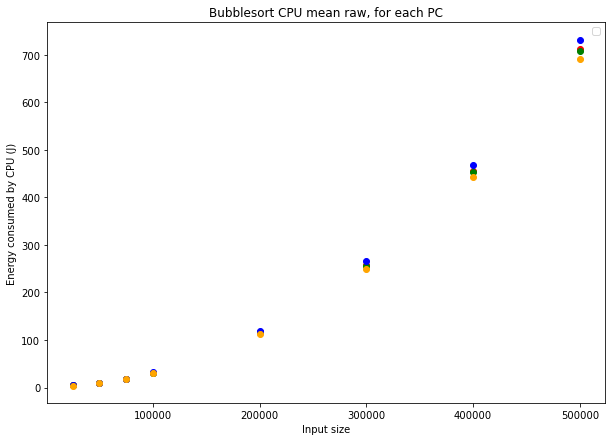

In [55]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "worst":
        plt.plot( mean16[i]["Size"],mean16[i]["CPU - readCSV"],"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "worst":
        plt.plot( mean21[i]["Size"],mean21[i]["CPU - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "worst":
        plt.plot( mean23[i]["Size"],mean23[i]["CPU - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "worst":
        plt.plot( mean6[i]["Size"],mean6[i]["CPU - readCSV"],"o", color = "orange")

plt.title("Bubblesort CPU mean minus ReadCSV CPU mean, for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by CPU (J)")
plt.show()

plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "worst":
        plt.plot( mean16[i]["Size"],mean16[i]["CPU (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "worst":
        plt.plot( mean21[i]["Size"],mean21[i]["CPU (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "worst":
        plt.plot( mean23[i]["Size"],mean23[i]["CPU (J)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "worst":
        plt.plot( mean6[i]["Size"],mean6[i]["CPU (J)"],"o", color = "orange")
plt.title("Bubblesort CPU mean raw, for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by CPU (J)")
plt.legend()
plt.show()

No handles with labels found to put in legend.


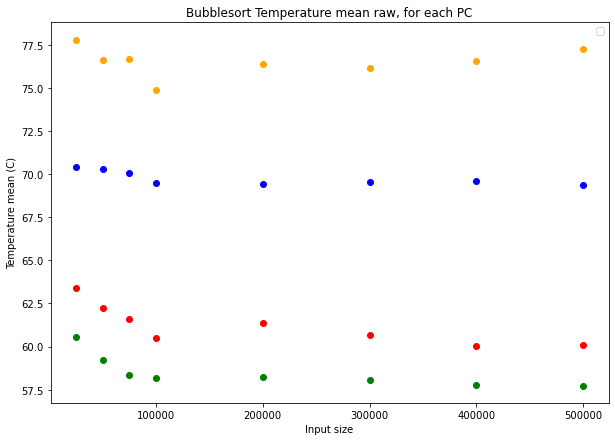

In [56]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "worst":
        plt.plot( mean16[i]["Size"],mean16[i]["Temperature"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "worst":
        plt.plot( mean21[i]["Size"],mean21[i]["Temperature"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "worst":
        plt.plot( mean23[i]["Size"],mean23[i]["Temperature"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "worst":
        plt.plot( mean6[i]["Size"],mean6[i]["Temperature"],"o", color = "orange")
plt.title("Bubblesort Temperature mean raw, for each PC")
plt.xlabel("Input size")
plt.ylabel("Temperature mean (C)")
plt.legend()
plt.show()

No handles with labels found to put in legend.


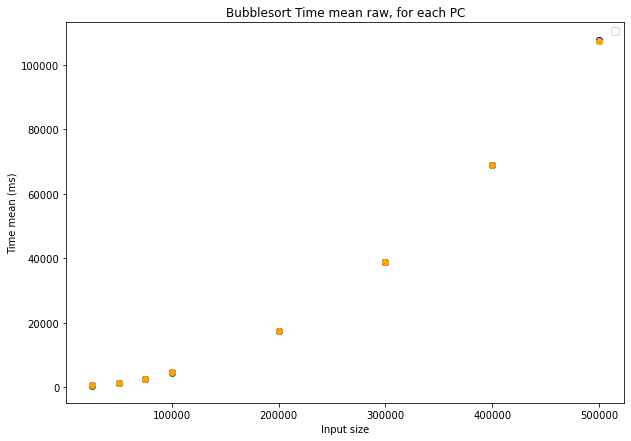

In [57]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "worst":
        plt.plot( mean16[i]["Size"],mean16[i]["Time (ms)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "worst":
        plt.plot( mean21[i]["Size"],mean21[i]["Time (ms)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "worst":
        plt.plot( mean23[i]["Size"],mean23[i]["Time (ms)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "worst":
        plt.plot( mean6[i]["Size"],mean6[i]["Time (ms)"],"o", color = "orange")
plt.title("Bubblesort Time mean raw, for each PC")
plt.xlabel("Input size")
plt.ylabel("Time mean (ms)")
plt.legend()
plt.show()

No handles with labels found to put in legend.


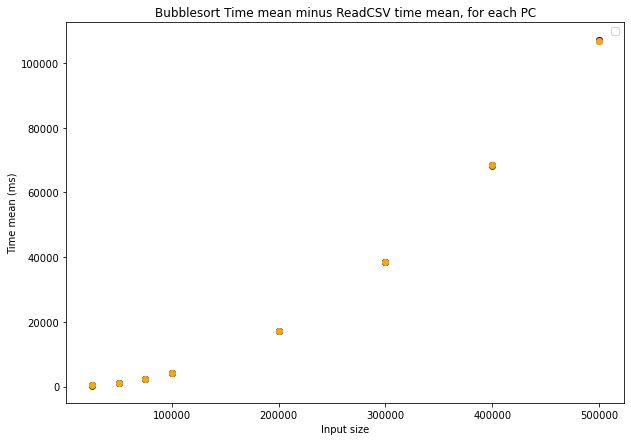

In [58]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "worst":
        plt.plot( mean16[i]["Size"],mean16[i]["Time - readCSV"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "worst":
        plt.plot( mean21[i]["Size"],mean21[i]["Time - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "worst":
        plt.plot( mean23[i]["Size"],mean23[i]["Time - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "worst":
        plt.plot( mean6[i]["Size"],mean6[i]["Time - readCSV"],"o", color = "orange")
plt.title("Bubblesort Time mean minus ReadCSV time mean, for each PC")
plt.xlabel("Input size")
plt.ylabel("Time mean (ms)")
plt.legend()
plt.show()

No handles with labels found to put in legend.


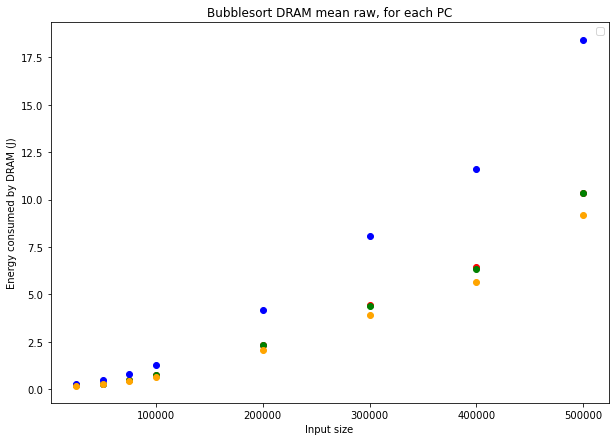

In [61]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "best":
        plt.plot( mean16[i]["Size"],mean16[i]["Memory (J)"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "best":
        plt.plot( mean21[i]["Size"],mean21[i]["Memory (J)"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "best":
        plt.plot( mean23[i]["Size"],mean23[i]["Memory (J)"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "best":
        plt.plot( mean6[i]["Size"],mean6[i]["Memory (J)"],"o", color = "orange")
plt.title("Bubblesort DRAM mean raw, for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by DRAM (J)")
plt.legend()
plt.show()

No handles with labels found to put in legend.


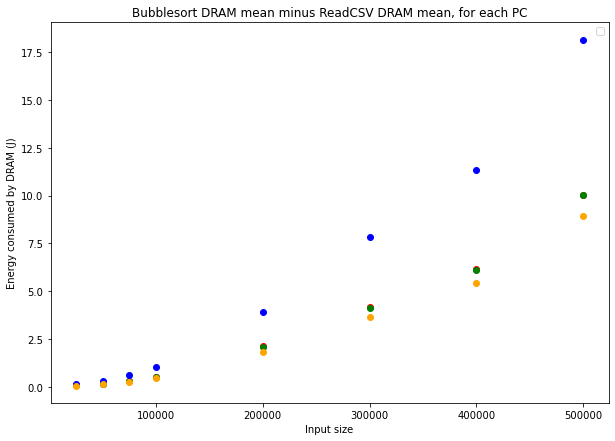

In [62]:
plt.figure(figsize=(10,7))
for i in range(len(mean16)):
    if mean16[i]["Input case"] == "best":
        plt.plot( mean16[i]["Size"],mean16[i]["Memory - readCSV"] ,"o", color = "red")

for i in range(len(mean21)):
    if mean21[i]["Input case"] == "best":
        plt.plot( mean21[i]["Size"],mean21[i]["Memory - readCSV"],"o", color = "green")

for i in range(len(mean23)):
    if mean23[i]["Input case"] == "best":
        plt.plot( mean23[i]["Size"],mean23[i]["Memory - readCSV"],"o", color = "blue")

for i in range(len(mean6)):
    if mean6[i]["Input case"] == "best":
        plt.plot( mean6[i]["Size"],mean6[i]["Memory - readCSV"],"o", color = "orange")
plt.title("Bubblesort DRAM mean minus ReadCSV DRAM mean, for each PC")
plt.xlabel("Input size")
plt.ylabel("Energy consumed by DRAM (J)")
plt.legend()
plt.show()